# Re-do planes for baseline case

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math
import pandas as pd
import postproamrwindsample as ppsample
import time
import utm

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

In [3]:
rundir = '/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/MedWS_LowTI/ABL_ALM_10x10/rundir_baseline/'
os.chdir(rundir)

In [4]:
# Load the starting point
case.loadAMRWindInput('MedWS_LowTI_Offshore_Stable_Farmrun1_10x10_restartnewplanes.inp')

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


OrderedDict()

In [5]:
# Delete all old sampling planes from precursor
case.listboxpopupwindict['listboxsampling'].deleteall()
case.listboxpopupwindict['listboxpostprosetup'].deleteall()

In [6]:
outputoptions="outputvars:velocity;tke;temperature;pressure outputderived:'grad(velocity) grad(p)' outputfreq:25"

turbsamplingcsv = """
# CSV file should have columns withturbinescsv=
# name, type, upstream, downstream, lateral, below, above, n1, n2, options
name,      type,       upstream, downstream, lateral, below, above, n1, n2, options
turbhh,    hubheight,  5,        5,         2,        0,     1.5,     11, 11, usedx:0.05 outputto:turbhh_ orientation:nacdir {outputoptions} noffsets:1
sw,        streamwise, 5,        5,         0,       0.625, 1.5,     11, 11, usedx:0.05 outputto:turbsw_  orientation:nacdir {outputoptions}
swA,       streamwise, 5,        5,         2,       0.625, 1.5,     11, 11, usedx:0.05 outputto:turbswA_  orientation:nacdir {outputoptions} noffsets:2
swB,       streamwise, 5,        5,        -2,       0.625, 1.5,     11, 11, usedx:0.05 outputto:turbswB_  orientation:nacdir {outputoptions} noffsets:2
rotor,     rotorplane, 5,        5,         2,       0.625, 1.5,     11, 11, usedx:0.05  outputto:rotor_   orientation:nacdir outputvars:velocity noffsets:10  {outputoptions}
rotorfine, rotorplane, 1,        1,         2,       0.625, 1.5,     11, 11, usedx:0.025 outputto:rotorfine_ orientation:nacdir outputvars:velocity noffsets:10  {outputoptions}
swdomain,  streamwise, 8,        8,         0,       0.625, 1.5,     11, 11, usedx:0.1  outputto:swdomain_ orientation:nacdir  center:farm wholedomain:1 {outputoptions}
turbdomain,hubheight,  8,        8,         2,       0,     1.5,     11, 11, usedx:0.1  outputto:turbdomain_ orientation:nacdir center:farm wholedomain:1  {outputoptions} noffsets:1

swdomain00, streamwise, 8,        8,         0,       0.625, 1.5,     11, 11, usedx:0.1  outputto:swdomain00_ orientation:nacdir  center:specified centerx:-6572.93506  centery:-2500.0      centerz:150  wholedomain:1 {outputoptions}
swdomain01, streamwise, 8,        8,         0,       0.625, 1.5,     11, 11, usedx:0.1  outputto:swdomain01_ orientation:nacdir  center:specified centerx:-5554.701295 centery:-3518.233765 centerz:150  wholedomain:1 {outputoptions}
swdomain03, streamwise, 8,        8,         0,       0.625, 1.5,     11, 11, usedx:0.1  outputto:swdomain03_ orientation:nacdir  center:specified centerx:-3518.233765 centery:-5554.701295 centerz:150  wholedomain:1 {outputoptions}
swdomain04, streamwise, 8,        8,         0,       0.625, 1.5,     11, 11, usedx:0.1  outputto:swdomain04_ orientation:nacdir  center:specified centerx:-2500.0      centery:-6572.93506  centerz:150  wholedomain:1 {outputoptions}
inoutflow,  rotorplane, 3000,     5000,   2500,       150,   360,     11, 11, usedx:10   outputto:inoutflow_  orientation:winddir center:specified centerx:4000 centery:4000 centerz:150 units:meter  {outputoptions} noffsets:8
sideflowA,  streamwise, 3000,     5000,   2500,       150,   360,     11, 11, usedx:10   outputto:sideflowA_  orientation:winddir center:specified centerx:4000 centery:4000 centerz:150 units:meter  {outputoptions} noffsets:5
sideflowB,  streamwise, 3000,     5000,  -2500,       150,   360,     11, 11, usedx:10   outputto:sideflowB_  orientation:winddir center:specified centerx:4000 centery:4000 centerz:150 units:meter  {outputoptions} noffsets:5
turbuptipdomain, hubheight,  8,        8,         2,        0.5,   1.5,    11, 11, usedx:0.1 outputto:turbuptipdomain_ orientation:nacdir center:specified centerx:4000 centery:4000 centerz:270 wholedomain:1 {outputoptions} 
turbuptip, hubheight,  3000,      5000,   2500,       0.5,   1.5,    11, 11, usedx:10 outputto:turbuptip_ orientation:nacdir center:specified centerx:4000 centery:4000 centerz:270 units:meter {outputoptions} 
turb1Duptip, hubheight,  3000,      5000,   2500,       0.5,   1.5,    11, 11, usedx:10 outputto:turb1Duptip_ orientation:nacdir center:specified centerx:4000 centery:4000 centerz:390 units:meter {outputoptions} 
turb1p5Duptip, hubheight,3000,      5000,   2500,       0.5,   1.5,    11, 11, usedx:10 outputto:turb1p5Duptip_ orientation:nacdir center:specified centerx:4000 centery:4000 centerz:510 units:meter {outputoptions} 
turbbottip, hubheight,  3000,      5000,   2500,       0.5,   1.5,    11, 11, usedx:10 outputto:turbbottip_ orientation:nacdir center:specified centerx:4000 centery:4000 centerz:30 units:meter {outputoptions} 
""".format(outputoptions=outputoptions)

case.setAMRWindInput('sampling_csvtextbox', turbsamplingcsv)
case.setAMRWindInput('sampling_deleteprev', True)

In [7]:
case.sampling_createAllProbes(verbose=False)
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxsampling'].getitemlist())

['T00_turbhh', 'T01_turbhh', 'T02_turbhh', 'T03_turbhh', 'T04_turbhh', 'T05_turbhh', 'T06_turbhh', 'T07_turbhh', 'T08_turbhh', 'T00_sw', 'T01_sw', 'T02_sw', 'T03_sw', 'T04_sw', 'T05_sw', 'T06_sw', 'T07_sw', 'T08_sw', 'T00_swA', 'T01_swA', 'T02_swA', 'T03_swA', 'T04_swA', 'T05_swA', 'T06_swA', 'T07_swA', 'T08_swA', 'T00_swB', 'T01_swB', 'T02_swB', 'T03_swB', 'T04_swB', 'T05_swB', 'T06_swB', 'T07_swB', 'T08_swB', 'T00_rotor', 'T01_rotor', 'T02_rotor', 'T03_rotor', 'T04_rotor', 'T05_rotor', 'T06_rotor', 'T07_rotor', 'T08_rotor', 'T00_rotorfine', 'T01_rotorfine', 'T02_rotorfine', 'T03_rotorfine', 'T04_rotorfine', 'T05_rotorfine', 'T06_rotorfine', 'T07_rotorfine', 'T08_rotorfine', 'Farm_swdomain', 'Farm_turbdomain', 'Farm_swdomain00', 'Farm_swdomain01', 'Farm_swdomain03', 'Farm_swdomain04', 'Farm_inoutflow', 'Farm_sideflowA', 'Farm_sideflowB', 'Farm_turbuptipdomain', 'Farm_turbuptip', 'Farm_turb1Duptip', 'Farm_turb1p5Duptip', 'Farm_turbbottip']


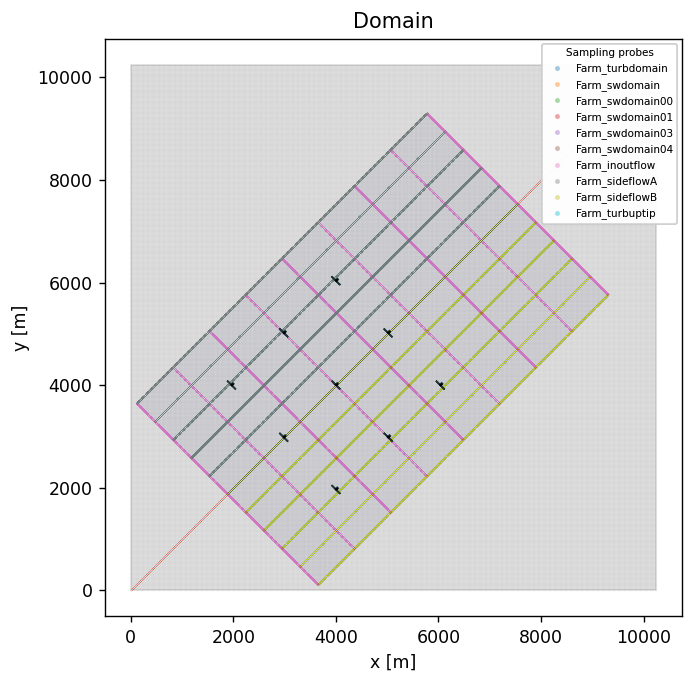

In [8]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['Farm_turbdomain' , 'Farm_swdomain',  'Farm_swdomain00', 'Farm_swdomain01', 
                                                                'Farm_swdomain03', 'Farm_swdomain04', 'Farm_inoutflow', 'Farm_sideflowA', 'Farm_sideflowB',
                                                                'Farm_turbuptip', 
                                                               ]
case.popup_storteddata['plotdomain']['plot_sampleprobes_style'] = "{'markersize':0.01, 'marker':'.', 'linestyle':'None','alpha':0.25, }"
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':400}"
case.plotDomain(ax=ax)

Text(0.5, 1.0, 'Initial Temp. Profile')

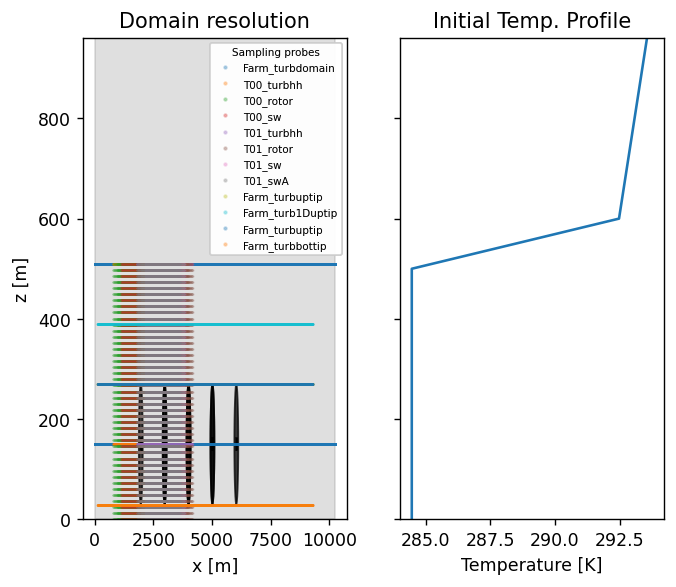

In [9]:
fig, axs = plt.subplots(1,2, figsize=(6,5), facecolor='w', dpi=125, sharey=True)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['Farm_turbdomain' , 'T00_turbhh', 'T00_rotor', 'T00_sw' , 'T01_turbhh', 'T01_rotor', 'T01_sw', 'T01_swA', #'Farm_swdomain', 
                                                                'Farm_turbuptip', 'Farm_turb1Duptip', 'Farm_turbuptip', 'Farm_turbbottip', #'Farm_inoutflow'
                                                               ]
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ' 
case.popup_storteddata['plotdomain']['plot_sampleprobes_style'] = "{'markersize':0.5, 'marker':'.', 'linestyle':'None','alpha':0.25}"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.plotDomain(ax=axs[0])
axs[0].set_title('Domain resolution')
axs[0].axis('auto')
axs[0].set_ylim([0,960])

case.plotGenericProfile('ABL.temperature_values', 'ABL.temperature_heights', ax=axs[1])
axs[1].set_ylim([0,960])
#axs[1].axis('scaled')
axs[1].set_xlabel('Temperature [K]')
axs[1].set_title('Initial Temp. Profile')

In [10]:
# Write the input file
print(case.writeAMRWindInput('MedWS_LowTI_Offshore_Stable_Farmrun1_10x10_restartallnewplanes.inp'))

# --- Simulation time control parameters ---
time.stop_time                           = 26200.0             # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.02                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 1000                
time.checkpoint_start                    = 100000              
incflo.physics                           = ABL Actuator        # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
io.restart_file                          = chk140000           
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms               